* In this situation, we have 253 datasets as 253 days of Tesla prices
* For this, I will go though step by step for analysis and future prediction based on machine learning/AI algorithms, regression algorith from different packages, modules and classes.
* My project task is to create a machine learning model which can see the predict adj close cost of Tesla stock based on dates.

This is the most important steps in data analysis we must understand the data and the domain well before trying to apply any machine learning

In [5]:

# we read the data set
#also all of the import from the below steps are written once again up here:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Importing seaborn for visualization
import pydotplus
import pickle
import os

import joblib
import matplotlib.dates as mdates

%matplotlib inline

df = pd.read_csv('/Users/tongminhquan/Desktop/TESLA.csv')




step 2 is to create a prediction model on final Adj Close price

In [6]:
# 3 Identify the target variable
target_variable = 'Adj Close'
print("Target Variable:", target_variable)

Target Variable: Adj Close


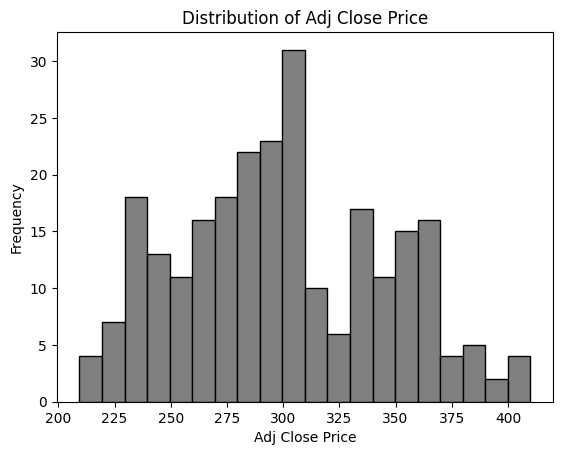

In [7]:
#4 Visualizing the distribution of the target variable

plt.hist(df['Adj Close'], bins=20, color='grey', edgecolor='black')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Adj Close Price')
plt.show()

The data distribution of the target variable is good to proceed
There are enough rows for each types of values to learn

#5 Data exploration at a basic level

In [8]:

print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-09-29  259.933319  264.500000  256.893341  260.436676  260.436676   
1  2021-09-30  260.333344  263.043335  258.333344  258.493347  258.493347   
2  2021-10-01  259.466675  260.260010  254.529999  258.406677  258.406677   
3  2021-10-04  265.500000  268.989990  258.706665  260.510010  260.510010   
4  2021-10-05  261.600006  265.769989  258.066681  260.196655  260.196655   

     Volume  
0  62828700  
1  53868000  
2  51094200  
3  91449900  
4  55297800  


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
248,2022-09-23,283.089996,284.500000,272.820007,275.329987,275.329987,63615400
249,2022-09-26,271.829987,284.089996,270.309998,276.010010,276.010010,58076900
250,2022-09-27,283.839996,288.670013,277.510010,282.940002,282.940002,61925200
251,2022-09-28,283.079987,289.000000,277.570007,287.809998,287.809998,54664800
252,2022-09-29,282.760010,283.649994,265.779999,268.209991,268.209991,77393100


In [10]:
df.shape

(253, 7)

In [11]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
df.nunique()

Date         253
Open         249
High         251
Low          251
Close        252
Adj Close    252
Volume       253
dtype: int64

seems like all of the 6 attribute are fine since they are already even and all are continuous

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [14]:
#summary statistic
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  253.000000  253.000000  253.000000  253.000000  253.000000   
mean   300.136008  307.486021  292.114058  299.709104  299.709104   
std     46.139272   46.789896   44.685331   45.788283   45.788283   
min    207.949997  217.973328  206.856674  209.386673  209.386673   
25%    266.513336  273.166656  260.723328  266.923340  266.923340   
50%    298.500000  303.709991  289.130005  296.666656  296.666656   
75%    335.600006  344.950012  327.510010  336.336670  336.336670   
max    411.470001  414.496674  405.666656  409.970001  409.970001   

             Volume  
count  2.530000e+02  
mean   8.050938e+07  
std    2.546595e+07  
min    3.504270e+07  
25%    6.255570e+07  
50%    7.695630e+07  
75%    9.347310e+07  
max    1.885563e+08  


so as we did some basic explore on our data we can see:

* There are 7 attributes.
* Date is the column contains the date of the trading day.
* Open is the open price of stock opened on that day
* High is the highest price of stock on that 24h day
* Low is the lowest price of the stock during the trading day.
* Close is the price of the stock at the end of the trading day.
* ADJ close is the adjusted closing price of the stock. It is adjusted for factors such as dividends, stock splits, and other corporate actions
* Volume is total number of shares traded during the trading day.

 Since our 'Close' is not relevant as compared to 'Adj Close' the Adj Close column is already combine of what 'Close' column gave us and 'Adj Close' it has other factors for the final close price such as stock splits and devidends.

In [15]:

# Check if 'Close' column exists before attempting to drop it 

if 'Close' in df.columns:
    df.drop('Close', axis=1, inplace=True)
else:
    print("The 'Close' column does not exist in the DataFrame.")



In [16]:
# check once again if 'Close' is still there
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], dtype='object')


'Close' is deleted

Step 7: Visual Exploratory Data Analysis of data

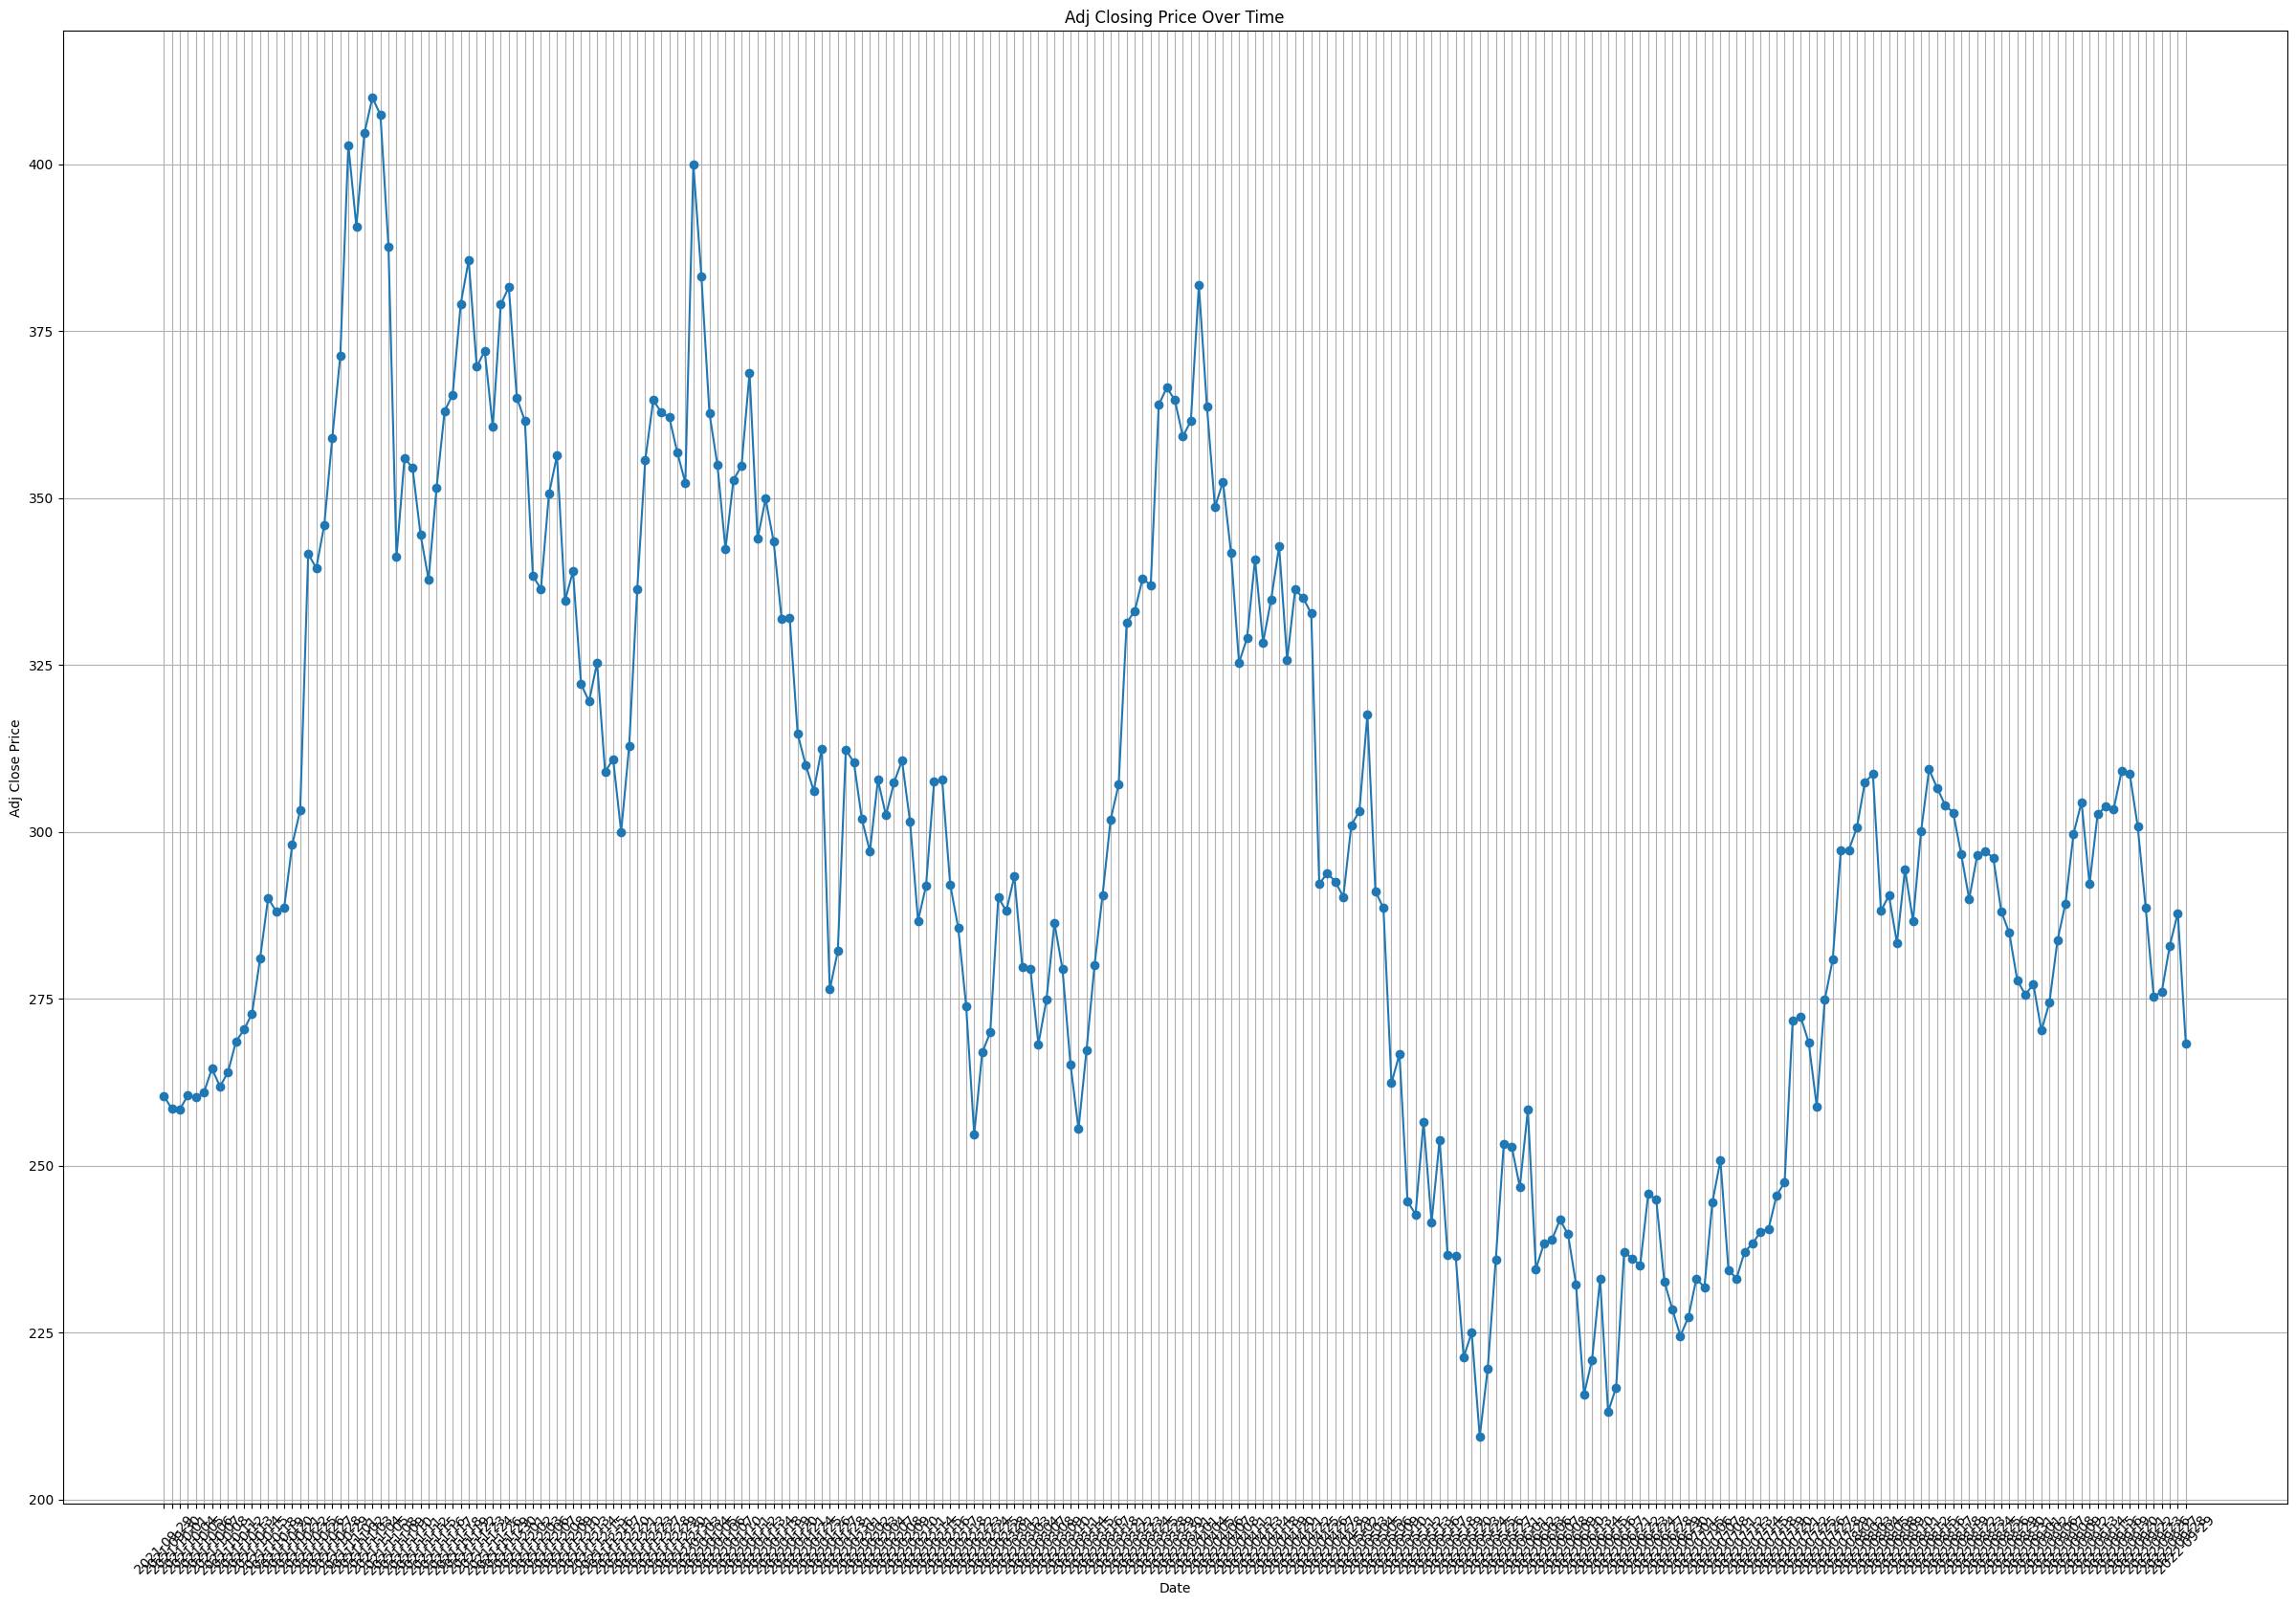

In [17]:

# Visualization 1: Line plot of 'Adj Close' price over time

plt.figure(figsize=(30,20))
plt.plot(df['Date'], df['Adj Close'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Closing Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



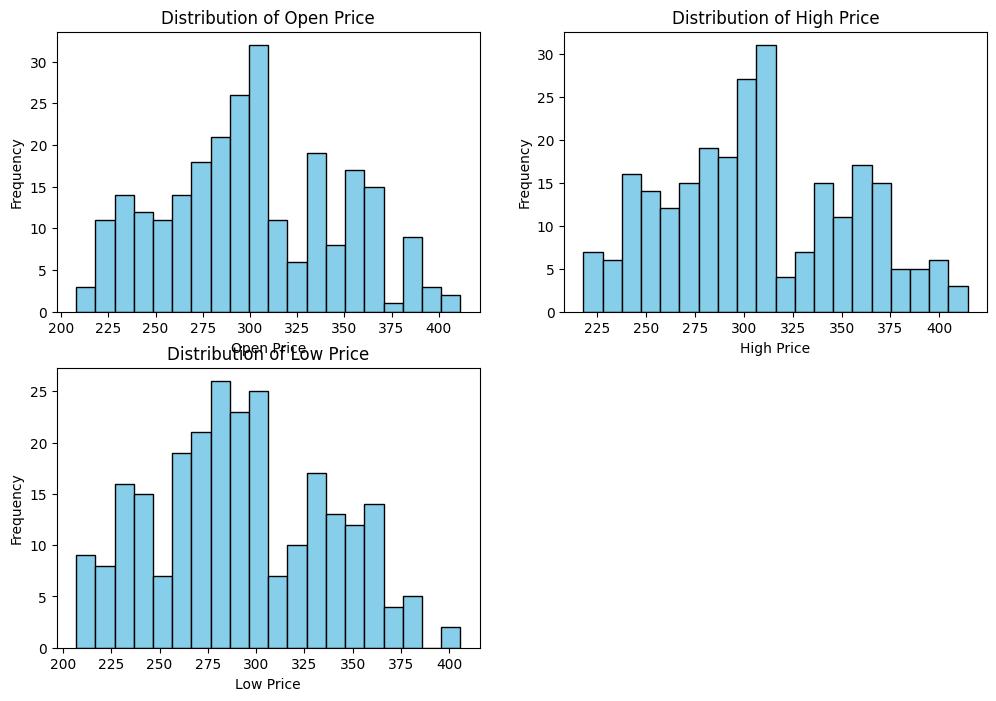

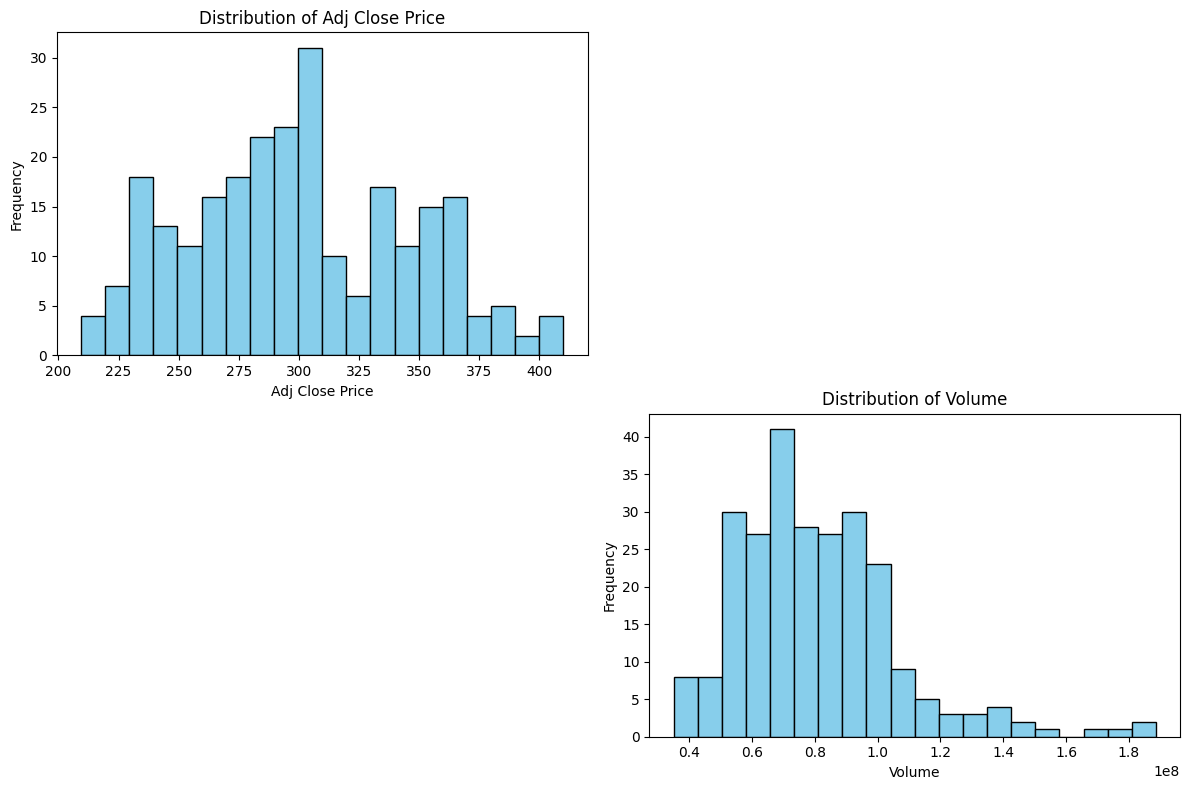

In [18]:
# Visualization 2: Distribution of 'Open', 'High', 'Low', 'ADJ Close', 'Volume' prices

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['Open'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Open Price')

plt.subplot(2, 2, 2)
plt.hist(df['High'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('High Price')
plt.ylabel('Frequency')
plt.title('Distribution of High Price')

plt.subplot(2, 2, 3)
plt.hist(df['Low'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Low Price')
plt.ylabel('Frequency')
plt.title('Distribution of Low Price')

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.hist(df['Adj Close'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Adj Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Adj Close Price')

plt.subplot(2, 2, 4)
plt.hist(df['Volume'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Volume')



plt.tight_layout()
plt.show()




you see on the X axis there is a few outliners in around 1.8

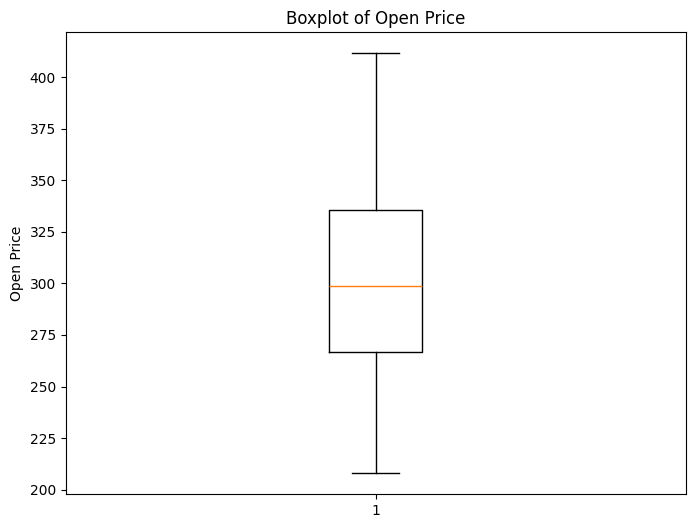

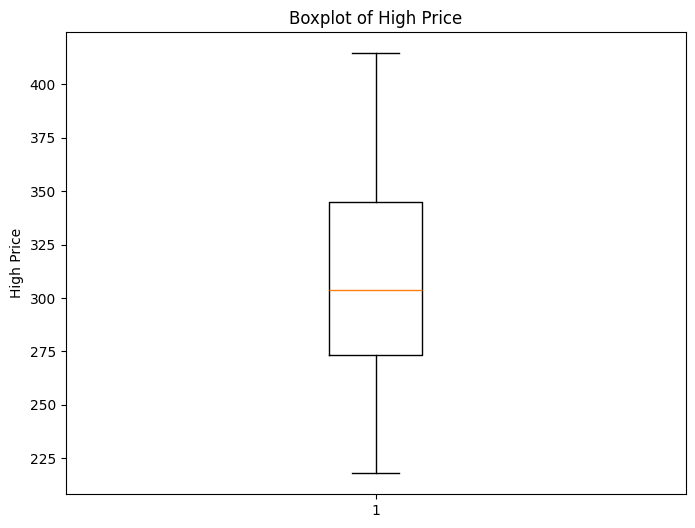

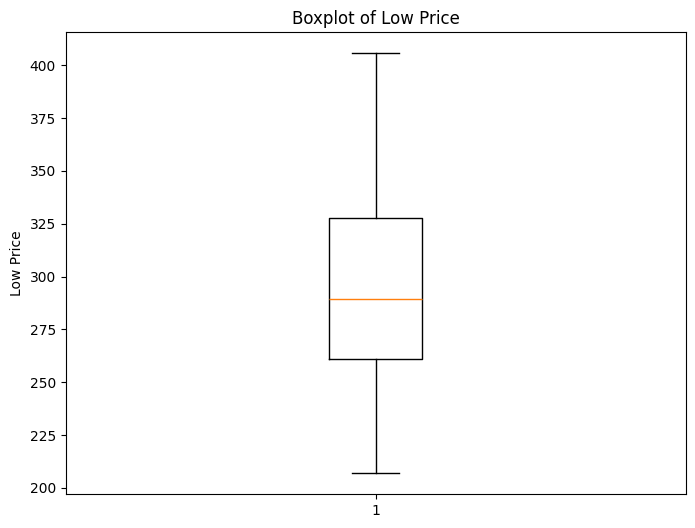

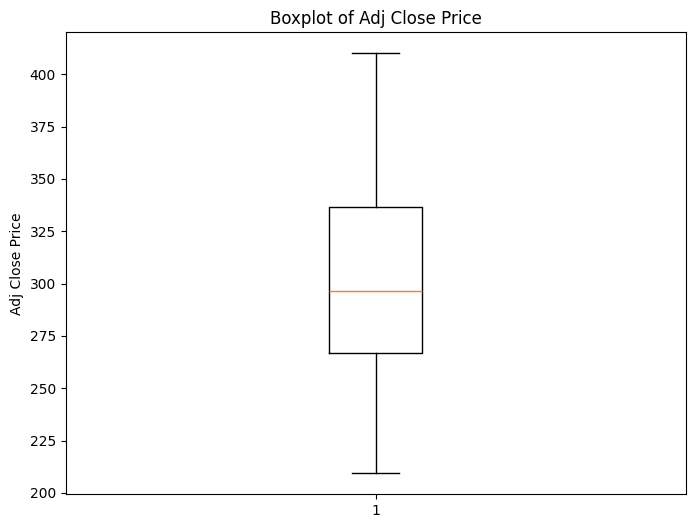

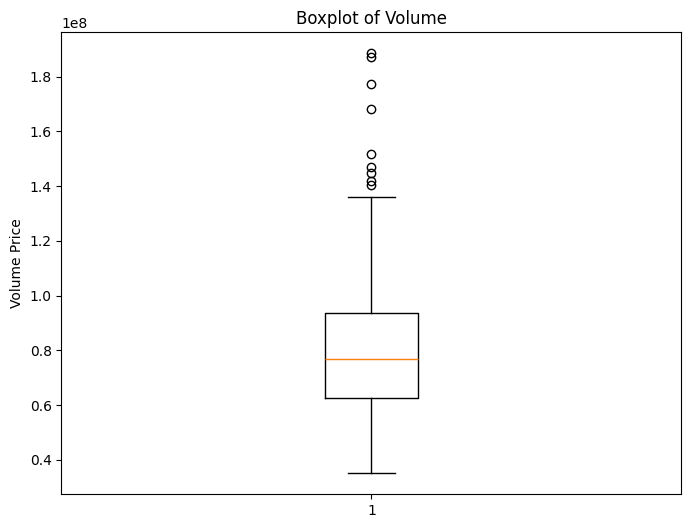

In [19]:
# Visualization 3: Box plot of 'Open', 'High', 'Low', 'ADJ close', 'Volume'price

plt.figure(figsize=(8, 6))
plt.boxplot(df['Open'])
plt.ylabel('Open Price')
plt.title('Boxplot of Open Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['High'])
plt.ylabel('High Price')
plt.title('Boxplot of High Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['Low'])
plt.ylabel('Low Price')
plt.title('Boxplot of Low Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['Adj Close'])
plt.ylabel('Adj Close Price')
plt.title('Boxplot of Adj Close Price')
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(df['Volume'])
plt.ylabel('Volume Price')
plt.title('Boxplot of Volume')
plt.show()


As we look in the boxplot, we dont have any outliners in the Volume box so we will remove it later on

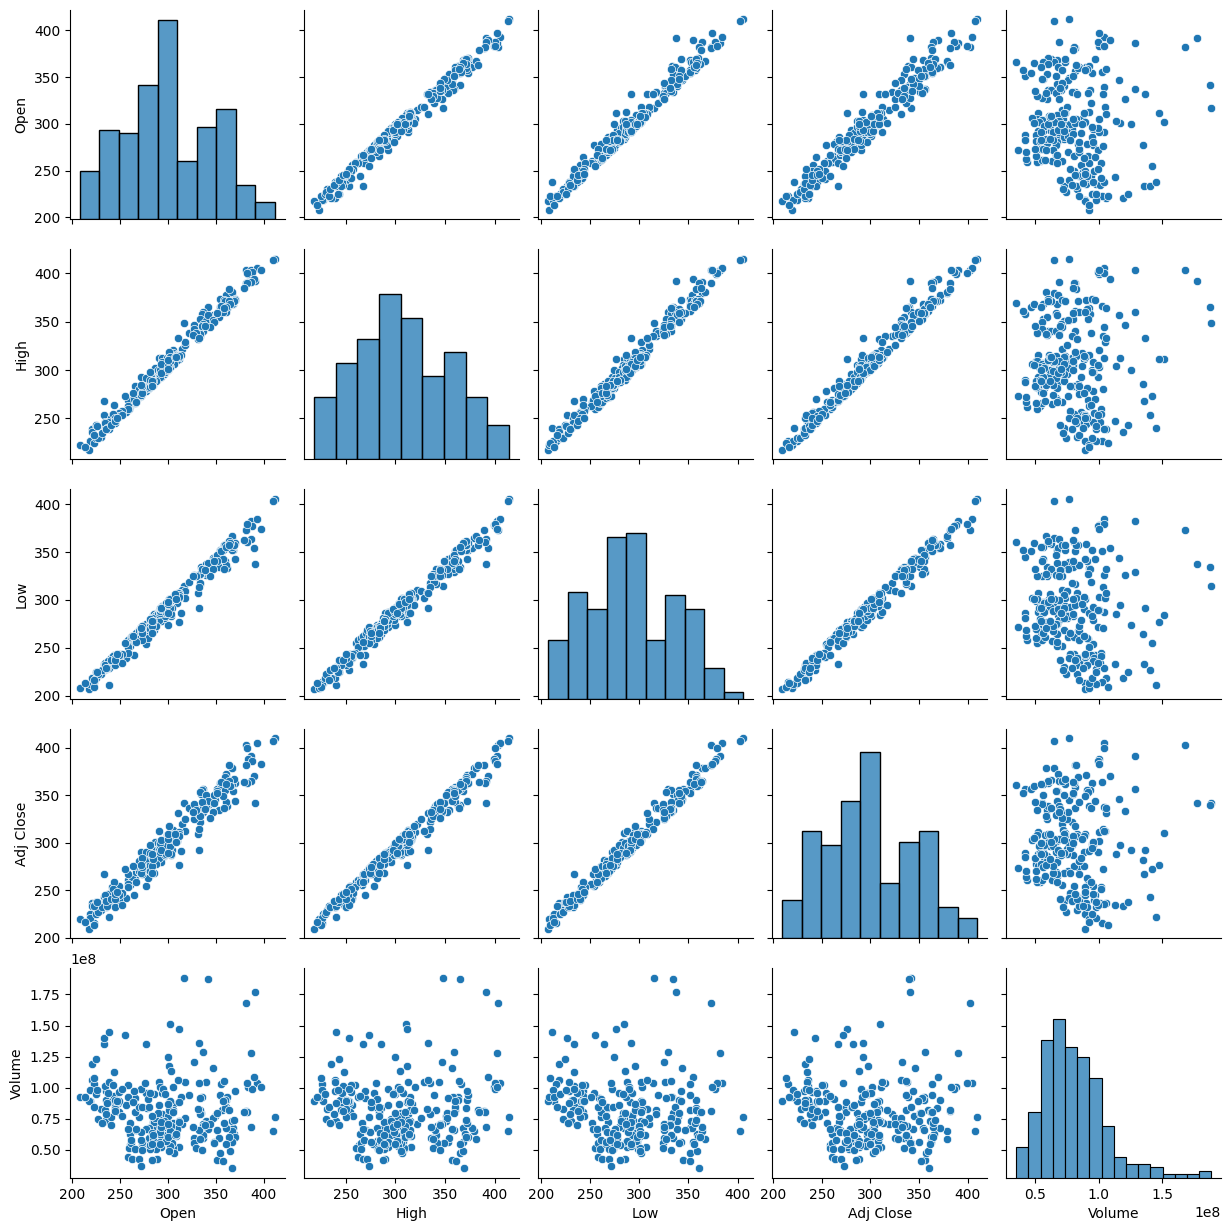

In [20]:
# Visualization 4: Pairplot for correlation visualization
sns.pairplot(df)
plt.show()

as we can see there is some outliner need to be remove

In [21]:
# Step 8: Feature selection based on data distribution

# convert non-numeric columns to numeric where possible
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# drop rows with NaN values resulting from non-convertible data
df_numeric.dropna(inplace=True)

# compute the correlation coefficients between features and the target variable
correlation_with_target = df_numeric.corr()['Adj Close'].abs().sort_values(ascending=False)

# select the top features with the highest correlation coefficients
top_features = correlation_with_target[1:]  # Exclude the target variable itself
print("Top features with their correlation coefficients:")
print(top_features)

# you can set a threshold to select features with correlation coefficients above a certain value
# let's say you want to select features with a correlation coefficient above 0.5
selected_features = top_features[top_features > 0.5].index.tolist()
print("\nSelected features:")
print(selected_features)



Top features with their correlation coefficients:
Open        NaN
High        NaN
Low         NaN
Adj Close   NaN
Volume      NaN
Name: Adj Close, dtype: float64

Selected features:
[]


step 9 
Check for missing values and outliners

In [22]:


# Check is there any missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)


Date         0
Open         0
High         0
Low          0
Adj Close    0
Volume       0
dtype: int64


nice, there is none so we dont have delete so we can continute further do remove outliners
we also don't have to sample rows

In [23]:
# Step 9: Removal of outliers
# Detect outliers using the Interquartile Range (IQR) method
Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Volume'] < lower_bound) | (df['Volume'] > upper_bound)

# Remove outliers
df = df[~outliers]

# Check the shape of the DataFrame after removing outliers
print("Shape of DataFrame after removing outliers:", df.shape)


Shape of DataFrame after removing outliers: (244, 6)


as you can see at first we have 253 and now is down 244 so there is 9 are outliers in Volume


so for that now we show the chart again to see it one more time for making sure its clean 

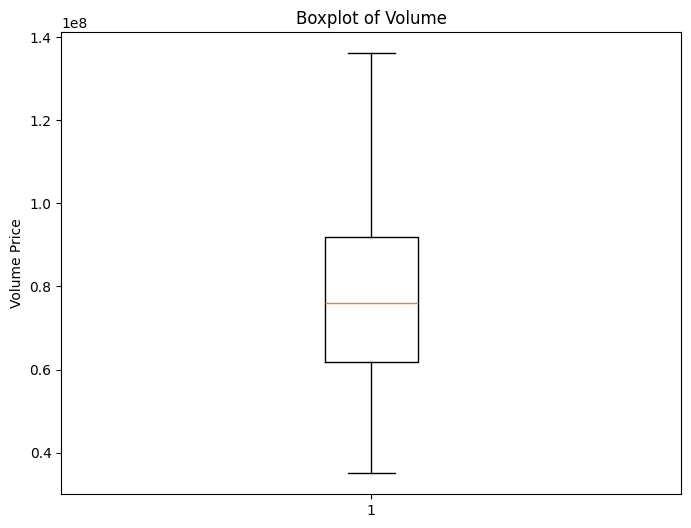

In [24]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Volume'])
plt.ylabel('Volume Price')
plt.title('Boxplot of Volume')
plt.show()

it is clean now

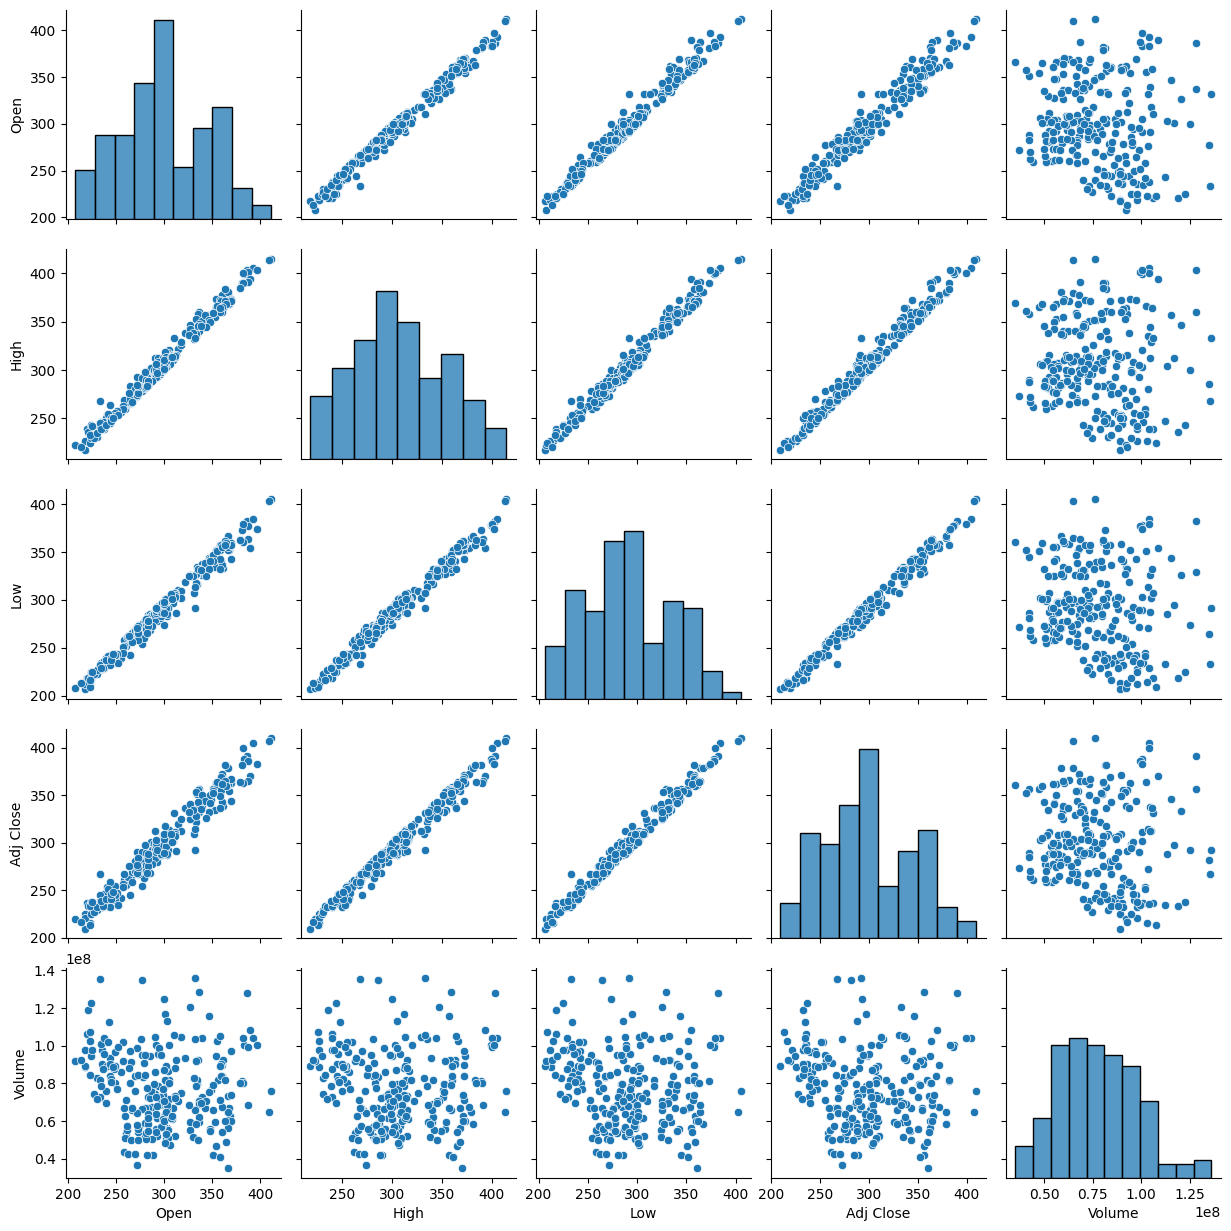

In [25]:
sns.pairplot(df)
plt.show()

array([[<Axes: title={'center': 'Volume'}>]], dtype=object)

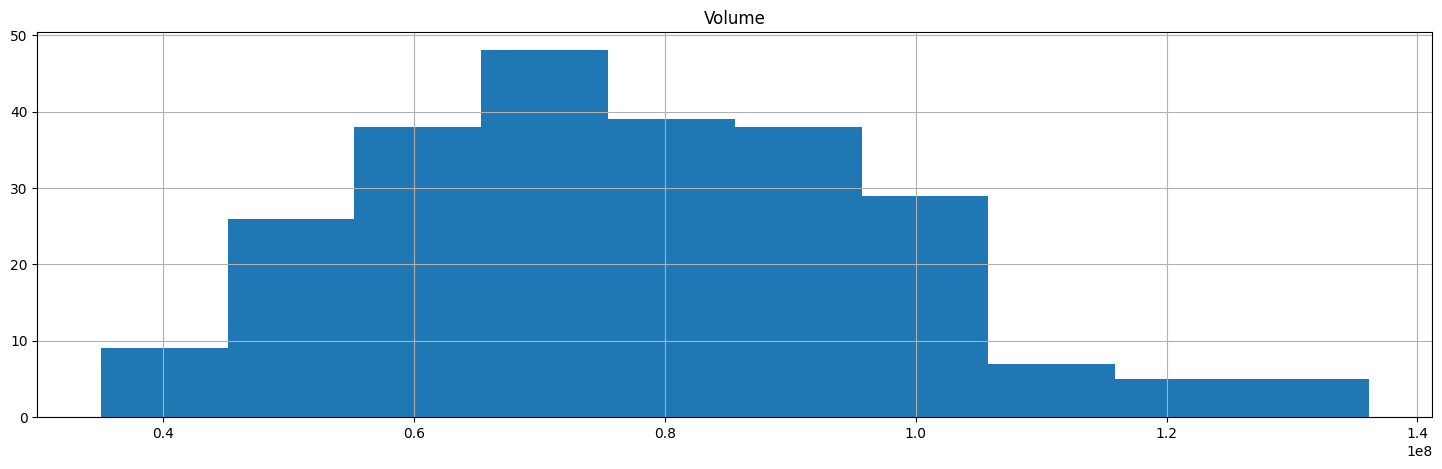

In [26]:
df.hist(['Volume'], figsize=(18,5))

it is now cleaned as we see above and now we have a bell curve

Descriptive statistics of the cleaned dataset:
             Open        High         Low   Adj Close        Volume
count  244.000000  244.000000  244.000000  244.000000  2.440000e+02
mean   299.851065  306.950464  292.186721  299.505068  7.754760e+07
std     45.770983   46.339108   44.435831   45.442065  2.030274e+07
min    207.949997  217.973328  206.856674  209.386673  3.504270e+07
25%    266.860824  272.825828  260.780823  266.862503  6.185460e+07
50%    297.496659  303.490005  289.565002  296.559998  7.592460e+07
75%    335.164993  344.161674  327.425003  336.267510  9.189608e+07
max    411.470001  414.496674  405.666656  409.970001  1.361337e+08


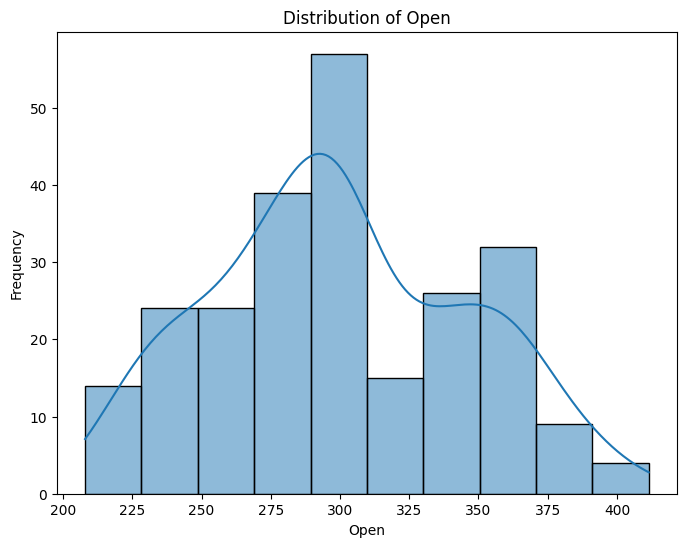

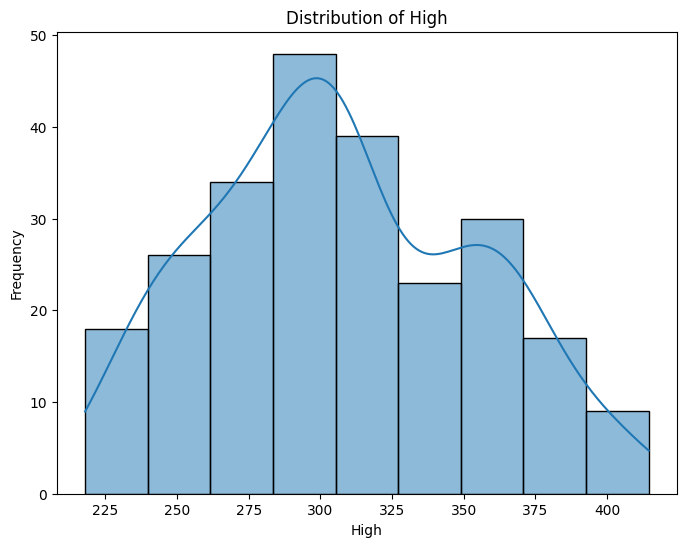

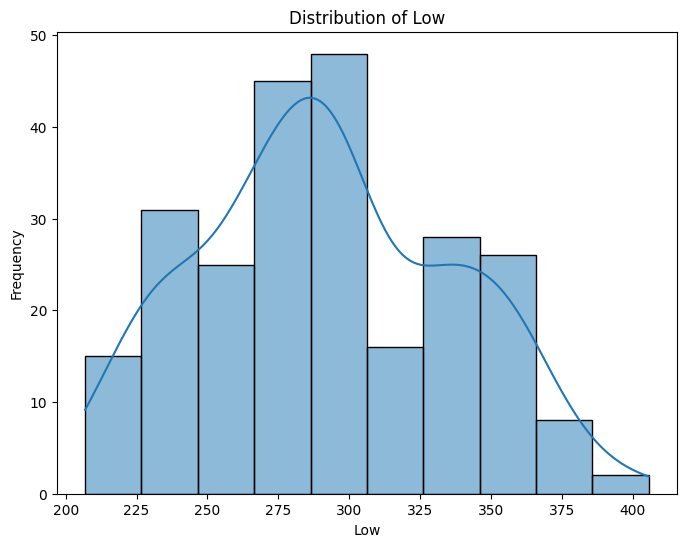

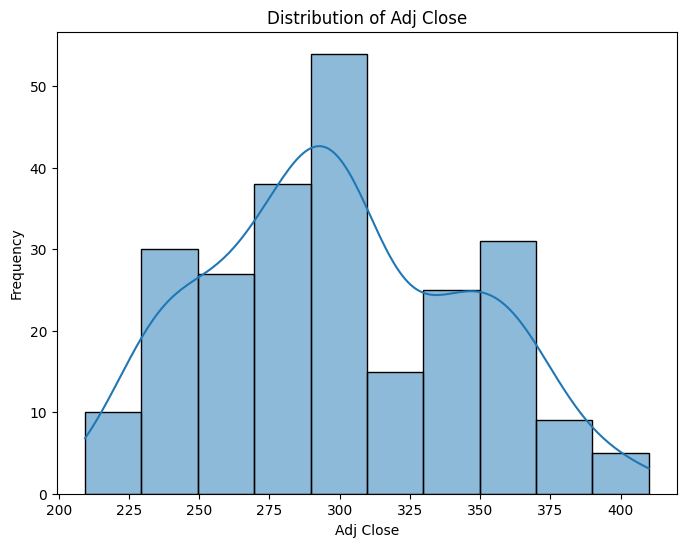

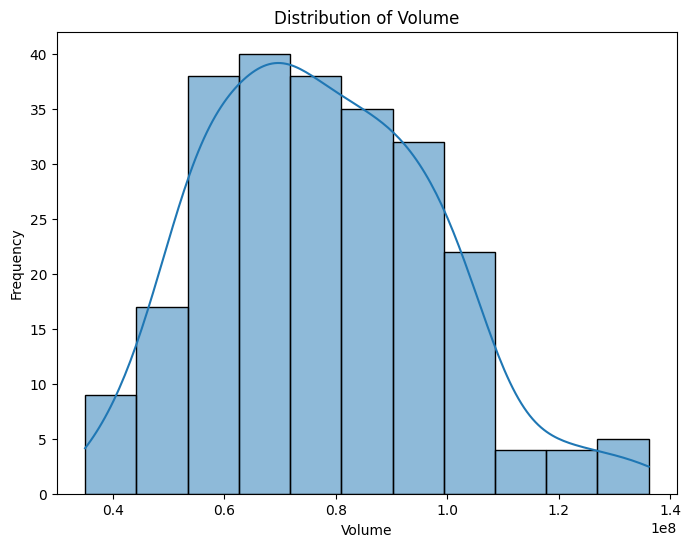

In [27]:
# Further analysis and modeling using df

# Lets Perform a descriptive statistics on the cleaned dataset
print("Descriptive statistics of the cleaned dataset:")
print(df.describe())


# Select numerical columns for visualization
numerical_columns = df.select_dtypes(include=['number']).columns

# Plot distributions of numerical variables
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()





In [28]:
#making sure all columns are numeric 

print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Adj Close    float64
Volume         int64
dtype: object


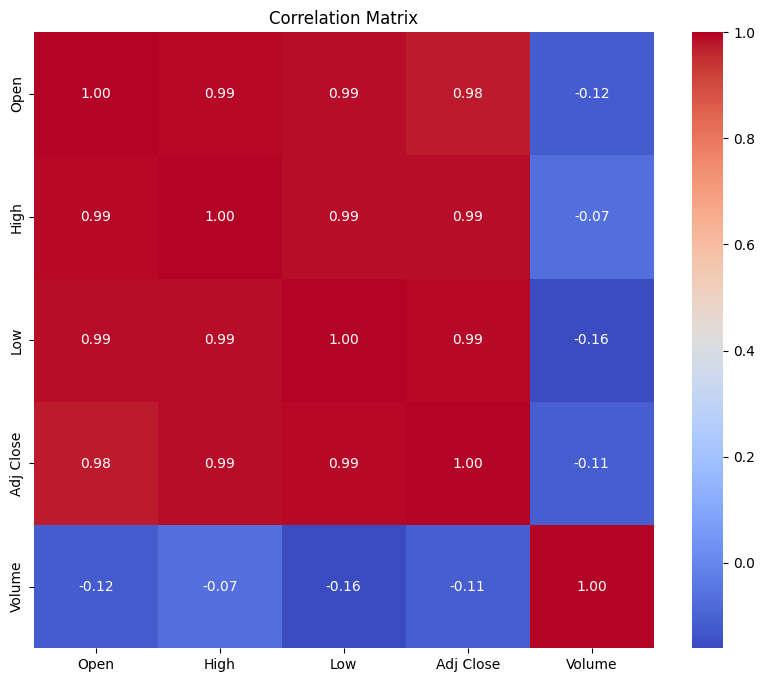

In [29]:
# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


lets analyse this :

Open, High and Low have strong positive correlation of 0.99 seems like when open price is high the high price tend to be high as well

Volume show weak negative correlations around -0.12 to -0.31 it seems that higher Volume will be having a higher lower price (which is obvious because low price stock people will buy)

Step 11: Data conversion to numeric values for machine learning/predictive analysis 
(this step is not nessesary as our data already in numeric format)


Now for the Step Train and Test

so we do a compare analysis between Linear Regression and Random Forest Regression models using K-fold cross-validation to evaluate their performance in predicting the adj close

* data preparation
* model intialising
* cross vali
* evaluation performance
* calculate the rmse avarage

Selecting final Predictors/Features for building Machine Learning/AI model.
Based on the tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as: Open, High, Low

In [30]:
SelectedColumns=['Open','High', 'Low']

# Selecting final columns
Dt4ml=df[SelectedColumns]
Dt4ml.head()

,Open,High,Low
0,259.933319,264.500000,256.893341
1,260.333344,263.043335,258.333344
2,259.466675,260.260010,254.529999
3,265.500000,268.989990,258.706665
4,261.600006,265.769989,258.066681


In [31]:
# Saving this final data subset for reference during deployment
Dt4ml.to_pickle('Dt4ml.pkl')

In [32]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = df.drop(columns=['Date']) #since we dont need will not cannot convert string to float

X = df.drop(columns=['Adj Close']) 
y = df['Adj Close']

# the number of folds for cross-validation
num_folds = 5

# lets make linear regression, random forest regression models
linear_reg = LinearRegression()
random_forest_reg = RandomForestRegressor()

#initialise KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# make an empty list store the Root Mean Square Error for each them both
linear_reg_rmse_list = []
random_forest_rmse_list = []

# prform K-fold cross-vali
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #train linear regres
    linear_reg.fit(X_train, y_train)
    linear_reg_pred = linear_reg.predict(X_test)
    linear_reg_rmse = mean_squared_error(y_test, linear_reg_pred, squared=False)
    linear_reg_rmse_list.append(linear_reg_rmse)
    
    # train random forest regres
    random_forest_reg.fit(X_train, y_train)
    random_forest_reg_pred = random_forest_reg.predict(X_test)
    random_forest_rmse = mean_squared_error(y_test, random_forest_reg_pred, squared=False)
    random_forest_rmse_list.append(random_forest_rmse)

# average RMSE for each 2 model
avg_linear_reg_rmse = sum(linear_reg_rmse_list) / num_folds
avg_random_forest_rmse = sum(random_forest_rmse_list) / num_folds

# we print the avarage
print('Average Linear Regression RMSE:', avg_linear_reg_rmse)
print('Average Random Forest Regression RMSE:', avg_random_forest_rmse)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_reg

Average Linear Regression RMSE: 4.357842415593845
Average Random Forest Regression RMSE: 5.9332435171526985


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
# here compare the average RMSE values of Linear Regression and Random Forest Regression
if avg_linear_reg_rmse < avg_random_forest_rmse:
    best_model = linear_reg
    best_model_name = 'Linear Regression'
else:
    best_model = random_forest_reg 
    best_model_name = 'Random Forest Regression'


print("Best Model:", best_model_name)

Best Model: Linear Regression


As we compare above, the better model is Linear Regression so now we use this to do define it with hypermeter

To continute , we typically want to choose the model that shows more precise in terms of its performance metric. Since the Linear Regression model has a lower average RMSE compared to the Random Forest Regression model we choose linear regression

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression


X_encoded = pd.get_dummies(df)

#define hyperparameters
param_grid = {
    'fit_intercept': [True, False]
}

#initialize Linear Regression 
linear_reg = LinearRegression()

#initialize Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=linear_reg, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', cv=kf)

#perform Grid Search
grid_search.fit(X_encoded, y)

# the best model from Grid Search CV
best_linear_reg = grid_search.best_estimator_

print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE:", -grid_search.best_score_)




Best Hyperparameters: {'fit_intercept': False}
Best RMSE: 1.5717065944914585e-10


Above, we perform a grid search over the specified parameter grid using cross-validation to find the best combination of hyperparameters for the Linear Regression model as we choose above step.

Then we initialise a new Linear model with the best hyperparameters and evaluates its performance using fold cross-validation. 

Then it prints the average RMSE for the best model

In [35]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

RegModel = LinearRegression()


print(RegModel)

# Create the model in data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# TargetVariable contains the name of the target variable column

TargetVariable = 'Adj Close' #is our target

#Predictors contain all columns except our target above
Predictors = df.columns[df.columns != TargetVariable]



# measure fit in traniing data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))


print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) 
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# we use mape so no 0s in target variable
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# calculate custom score mape

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)


# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9911989387011834

##### Model Validation and Accuracy Calculations ##########
          Open        High         Low     Volume   Adj Close  \
1   260.333344  263.043335  258.333344   53868000  258.493347   
14  292.510010  292.649994  287.503326   52143300  288.089996   
22  360.619995  371.736664  357.736664   89755200  371.333344   
24  386.453339  402.863342  382.000000  128213400  390.666656   
41  366.489990  369.593323  360.333344   35042700  360.640015   

    PredictedAdj Close  
1                261.0  
14               289.0  
22               368.0  
24               397.0  
41               364.0  
Mean Accuracy on test data: 98.83792137944319
Median Accuracy on test data: 99.02161780633185

Accuracy values for 10-fold Cross Validation:
 [99.35390376 98.90682937 98.64282578 98.60190197 98.7763294  98.53576991
 98.76133722 98.75176204 99.02823147 99.12422406]

Final Average Accuracy of the model: 98.85


Decision tree regressor 

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9934369053086759

##### Model Validation and Accuracy Calculations ##########
          Open        High         Low     Volume   Adj Close  \
1   260.333344  263.043335  258.333344   53868000  258.493347   
14  292.510010  292.649994  287.503326   52143300  288.089996   
22  360.619995  371.736664  357.736664   89755200  371.333344   
24  386.453339  402.863342  382.000000  128213400  390.666656   
41  366.489990  369.593323  360.333344   35042700  360.640015   

    PredictedAdj Close  
1                259.0  
14               288.0  
22               371.0  
24               407.0  
41               365.0  
Mean Accuracy on test data: 98.44347345040948
Median Accuracy on test data: 98.77531027300368

Accuracy values for 10-fold Cross Validation:
 [99.35390376 98.90682937 98.64282578 98.60190197 98.7763294  98.53576991
 98.76133722 98.75176204 99.02823147 99.12422406]

Final Average Accuracy of the model: 98.85

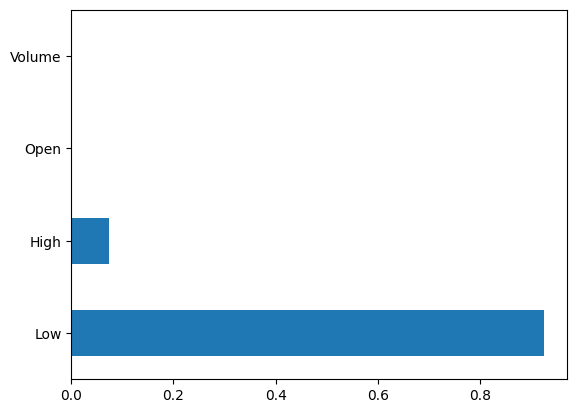

In [36]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor

RegModel1 = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Max_depth range around 2 to 20

print(RegModel1)

# create model
DT=RegModel1.fit(X_train,y_train)
prediction=DT.predict(X_test)


# Measure to fit in data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


print('\n##### Model Validation and Accuracy Calculations ##########')

# Print some samples
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# be sure no 0s in target variable 
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# calculate custom scoring

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

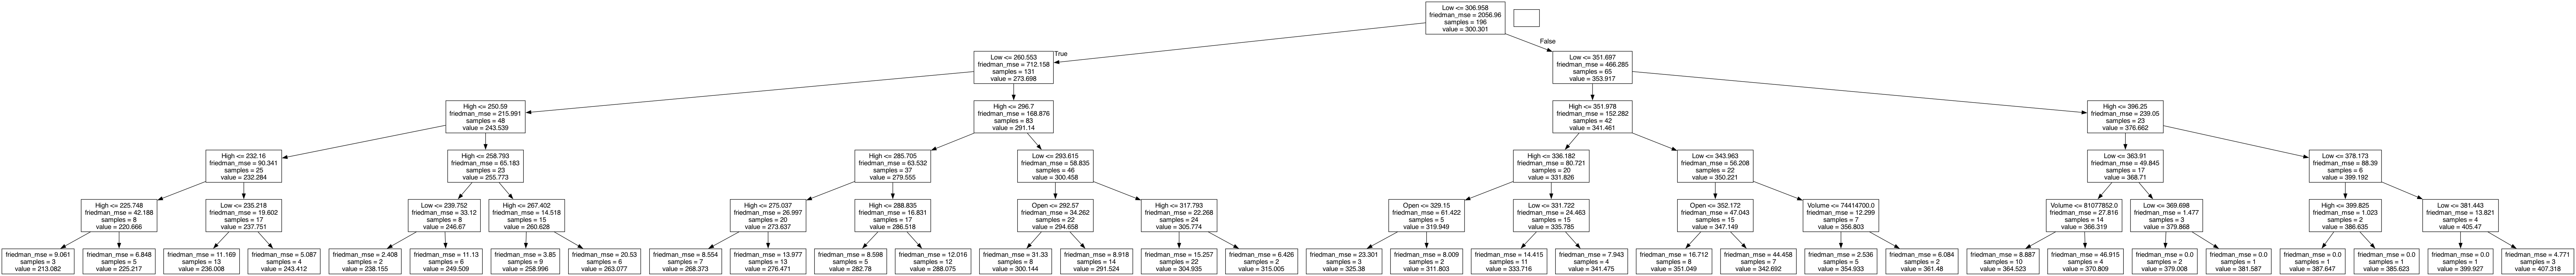

In [37]:
from IPython.display import Image
from sklearn import tree



dot_data = tree.export_graphviz(RegModel1, out_file=None,feature_names=Predictors)


graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=2000,height=2000)


Now we initialise a Random Forest Regressor model and evaluates its performance using fold cross-validation. 



RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9902297408963648

##### Model Validation and Accuracy Calculations ##########
          Open        High         Low     Volume   Adj Close  \
1   260.333344  263.043335  258.333344   53868000  258.493347   
14  292.510010  292.649994  287.503326   52143300  288.089996   
22  360.619995  371.736664  357.736664   89755200  371.333344   
24  386.453339  402.863342  382.000000  128213400  390.666656   
41  366.489990  369.593323  360.333344   35042700  360.640015   

    PredictedAdj Close  
1                261.0  
14               290.0  
22               366.0  
24               398.0  
41               365.0  
Mean Accuracy on test data: 98.47533602617936
Median Accuracy on test data: 98.7309918910491

Accuracy values for 10-fold Cross Validation:
 [99.35390376 98.90682937 98.64282578 98.60190197 98.7763294  98.53576991
 98.76133722 98.75176204 99.02823147 99.12422406]

Final Average Accuracy of

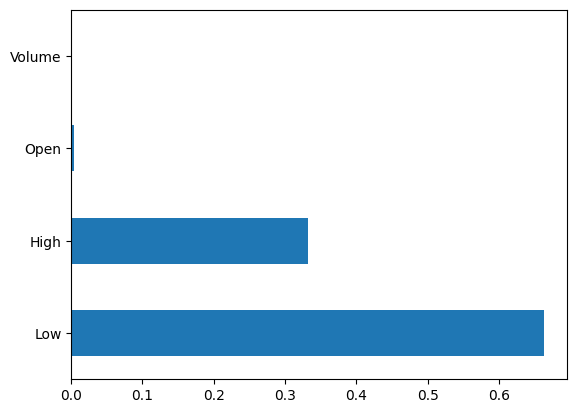

In [38]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor

RegModel2 = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# max_depth: 2-10 and n_estimators: 100-1000


print(RegModel2)

# Creating the model 
RF=RegModel2.fit(X_train,y_train)
prediction=RF.predict(X_test)


print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))


feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')


print('\n##### Model Validation and Accuracy Calculations ##########')

# Print sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# print sample prediction values
print(TestingDataResults.head())

# calculating the error 
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Adj Close']-TestingDataResults['PredictedAdj Close']))/TestingDataResults['Adj Close'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy)
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# be sure no 0s in target variable
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

# Custom Scoring MAPE calculation

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

we can plot decision tree in random forest regressor

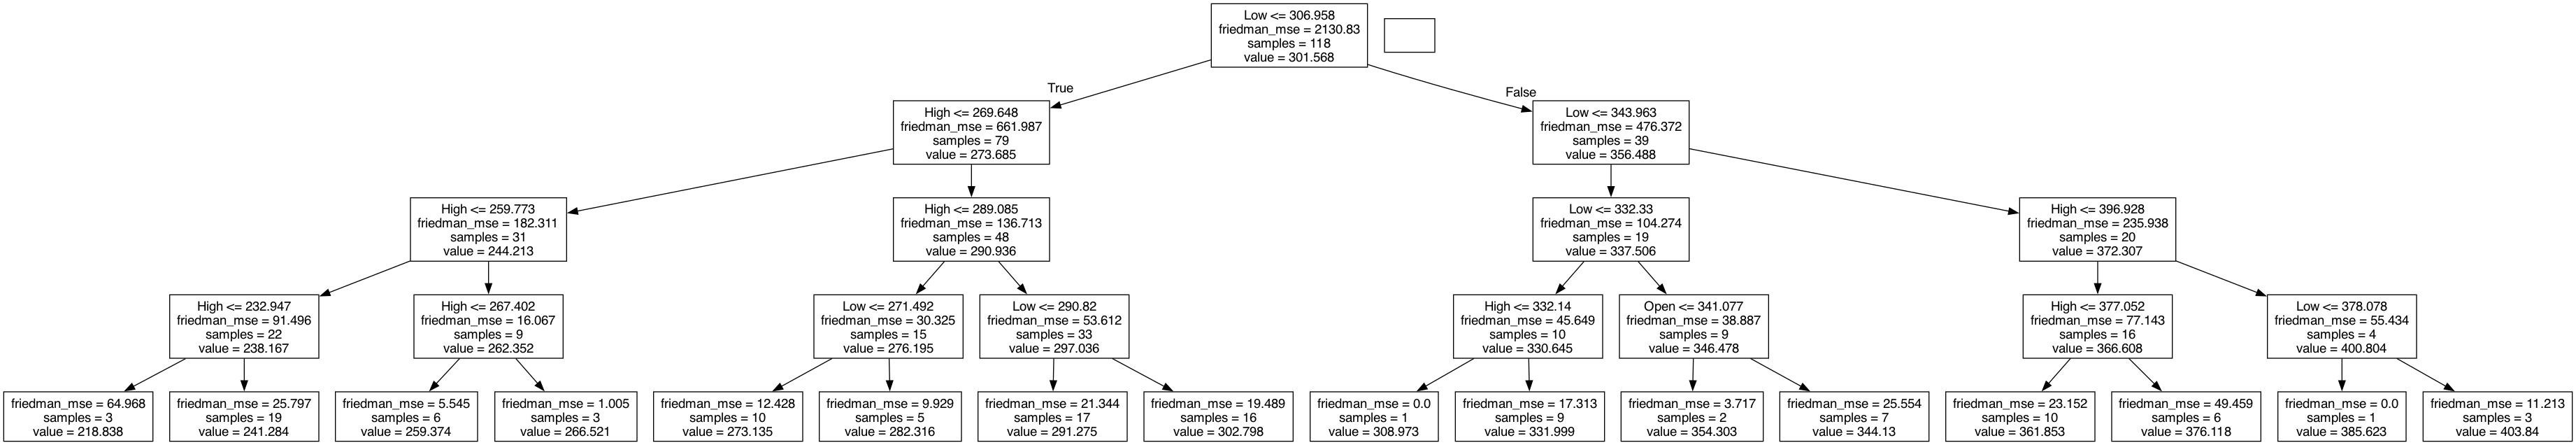

In [39]:

from IPython.display import Image
from sklearn import tree


# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel2.estimators_[5] , out_file=None, feature_names=Predictors)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png(), width=2000,height=2000)


 now we have to verifed the path and ensure that the model file exists and update the flask applicatipn 

We need a .pkl file for development steps later use

In [40]:


best_linear_reg = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')


joblib.dump(best_linear_reg, 'DTree_regression_model.pkl')


['DTree_regression_model.pkl']

now it is a model to a file for us to load it using flask to deploy it

Descions tree Regressor:




here, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them so lets choose linear regression

For this dataset, the most important predictor variables are 'Open', 'High', and 'Low'. As these are consistently variable importance and nessesary for the dataset. Hence choosing these as final set of predictor variables will result in better Close price prediction of our system.


In [41]:
#seperate target variable and predictor
TargetVariable='Adj Close'

# Selecting the final set of predictors for the deployment

Predictors=['Open', 'High', 'Low']

X=df[Predictors].values
y=df[TargetVariable].values


from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization is better since every data in predictions in variable is numeric

#scaler of variables
PredictorScaler=MinMaxScaler()

# Storing the fit object for later use
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(244, 3)
(244,)


now we Cross validating the final model accuracy with less predictors
choose from different tunable hyperparameters

from sklearn.tree import DecisionTreeRegressor

RegModel1 = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')

Running 10-Fold Cross validation on a given algorithm
Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

And then we retrain the final model using 100% data

In [42]:
Final_DTree_Model=RegModel.fit(X,y)

#also we save this as a serialized file which can be stored anywhere:

import pickle
import os
# we can use pickle library
# save the Final model
with open('Final_DTree_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_DTree_Model, fileWriteStream)
    
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /Users/tongminhquan/Desktop/VSC/ST1Assignments/capstone_project


now lets create python function now

In [43]:
from re import IGNORECASE
# This can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]


    # Appending the new data with the Training data
    df=pd.read_pickle('Dt4ml.pkl')
    #InputData=InputData.append(Dt4mlL, ignore_index=True)
    InputData = pd.concat([InputData, df], ignore_index=True)

    # Generate dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintain the same order of columns as it was during the model training
    Predictors=['Open', 'High', 'Low']

    # Generate the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_DTree_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)

        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

Lastly, we call the function for some new data


In [44]:
from sklearn.impute import SimpleImputer

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

NewSampleData=pd.DataFrame(data=[[259.933319,264.500000,256.893341],[260.333344,263.043335,258.333344]],columns=['Open', 'High', 'Low'])

# Fit and transform the input data instead of showing NaN values
X_imputed = imputer.fit_transform(NewSampleData)

print(NewSampleData)

# Now, you can use X_imputed as your input data for the model
Prediction = RegModel.predict(X_imputed)

print(Prediction)



         Open        High         Low
0  259.933319  264.500000  256.893341
1  260.333344  263.043335  258.333344
[50739.9418983  50691.54832919]


Deploying the model with few parameters

Function for predictions API

In [45]:
# Creating the function which can take inputs and return prediction
def FunctionGeneratePrediction(inp_Open , inp_High, inp_Low):

    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Open , inp_High, inp_Low]],
     columns=['Open', 'High', 'Low'])

    # Calling the function defined above using the input parameters
    Predictions=FunctionPredictResult(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionGeneratePrediction( inp_Open=259.933319,inp_High=264.500000,inp_Low=15.3 )

'{"Prediction":{"0":56.3375750501}}'

making flask api
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        Open_value = float(request.args.get('Open'))
        High_value=float(request.args.get('High'))
        Low_value=float(request.args.get('Low'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_Open=Open_value,
                                                       inp_RM=High_value,
                                                       inp_PTRATIO=Low_value)

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

we start that api engine:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=5001, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API